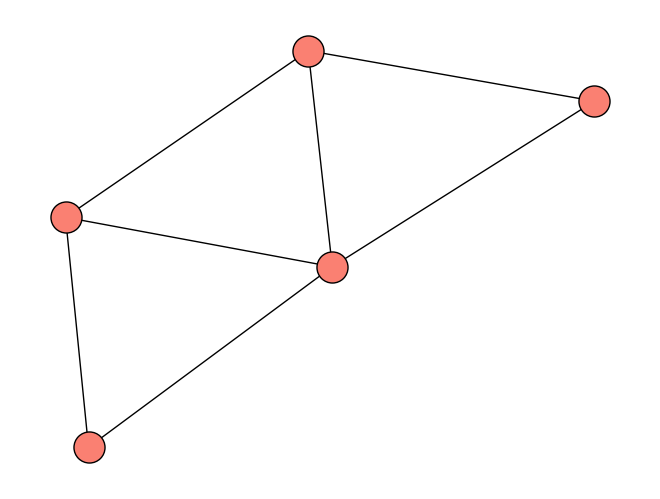

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math

G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5])

edges = [
    (1, 2), (1, 3), (1, 4),
    (2, 3), (2, 5), 
    (3, 4), (3, 5)
]

G.add_edges_from(edges)

args = {
    "node_size": 500,
    "node_color": "salmon",
    "edge_color": "black",
    "node_shape": "o",
    "linewidths": 1,
    "edgecolors": "black",
    "font_color": "black",
    "with_labels": False,
}

nx.draw(G, **args)

## Matrix Formalism

Let $A$ be the $N\times N$ adjacency matrix of an undirected unweighted network, without self-loops. Let $\textbf{1}$ be a column vector of $N$ elements, all equal to $1$. In other words $\textbf{1} = (1, 1, ..., 1)^T$ , where the superscript $T$ indicates the transpose operation.

In [26]:
A = nx.to_numpy_array(G)
ones = np.ones(len(G.nodes()))

print(f"Adjacency matrix:\n{A}\n")
print(f"Vector of ones:\n{ones}\n")

Adjacency matrix:
[[0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]]

Vector of ones:
[1. 1. 1. 1. 1.]




Use the matrix formalism (multiplicative constants, multiplication row by column, matrix operations like transpose and trace, etc, but avoid the sum symbol $\sum$) to write expressions for:

### Vector of degrees
The vector $\textbf{k}$ whose elements are the degrees $k_i$ of all nodes $i=1,2,\ldots,N$.

$$\textbf{k}=A\textbf{1}=
\begin{bmatrix}
a_{11}&a_{12}&\cdots&a_{1n}\\
a_{21}&a_{22}&\cdots&a_{2n}\\
\vdots&\vdots&\ddots&\vdots\\
a_{n1}&a_{n2}&\cdots&a_{nn}\\
\end{bmatrix}
\begin{bmatrix}
1\\1\\\vdots\\1
\end{bmatrix}=
\begin{bmatrix}
a_{11}+a_{12}+\ldots+a_{1n}\\
a_{21}+a_{22}+\ldots+a_{2n}\\
\vdots\\
a_{n1}+a_{n2}+\ldots+a_{nn}\\
\end{bmatrix}$$

### Number of links
The total number of links, $L$, in the network.

It can be calculated as:

$$L=\dfrac12(A\textbf{1}\cdot\textbf{1})=\dfrac12\begin{bmatrix}
a_{11}+a_{12}+\ldots+a_{1n}\\
a_{21}+a_{22}+\ldots+a_{2n}\\
\vdots\\
a_{n1}+a_{n2}+\ldots+a_{nn}\\
\end{bmatrix}\cdot\begin{bmatrix}
1\\1\\\vdots\\1
\end{bmatrix}=\dfrac12\sum_{i,j}a_{ij}$$

or, more simply, as:

$$L=\dfrac12\text{trace}(A^2)$$

In [27]:
import numpy as np

Asquared = A @ A
print(f"Adjacency matrix squared:\n{Asquared}\n")
print(f"Number of edges:\n{np.trace(Asquared) / 2}\n")

Adjacency matrix squared:
[[3. 1. 2. 1. 2.]
 [1. 3. 2. 2. 1.]
 [2. 2. 4. 1. 1.]
 [1. 2. 1. 2. 1.]
 [2. 1. 1. 1. 2.]]

Number of edges:
7.0



### Number of triangles
The number of triangles $T$ present in the network, where a triangle means three nodes, each connected by links to the other two (Hint: you can use the trace of a matrix).

$$T=\dfrac16\text{trace}(A^3)$$

In [28]:
Acubed = A @ A @ A
print(f"Adjacency matrix cubed:\n\n{Acubed}\n")
print(f"Number of triangles:\n{np.trace(Acubed) / 6}")

Adjacency matrix cubed:

[[4. 7. 7. 5. 3.]
 [7. 4. 7. 3. 5.]
 [7. 7. 6. 6. 6.]
 [5. 3. 6. 2. 3.]
 [3. 5. 6. 3. 2.]]

Number of triangles:
3.0


### Sum of degrees
The vector $k_{nn}$ whose element $i$ is the sum of the degrees of node $i$'s neighbors.
The vector $k_{nnn}$ whose element $i$ is the sum of the degrees of node $i$'s second neighbors.

$$k_{nn}=A^2\textbf{1}$$
$$k_{nnn}=A^3\textbf{1}$$

In [29]:
print(Asquared.sum(axis=1))
print(Acubed.sum(axis=1))

[ 9.  9. 10.  7.  7.]
[26. 26. 32. 19. 19.]


Average clustering coefficient

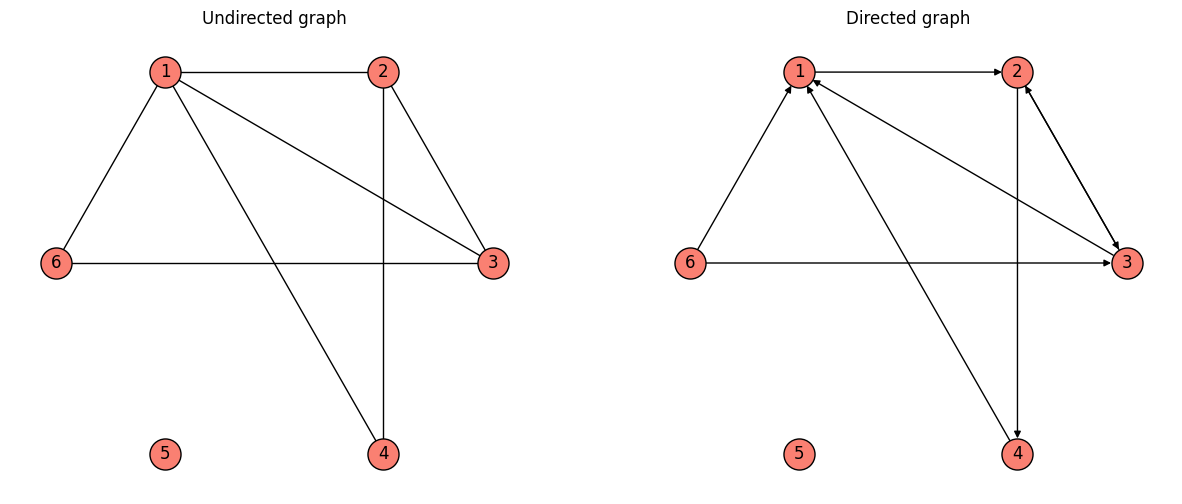

In [30]:
G = nx.Graph()
G.add_nodes_from([i for i in range(1, 7)])
edges = [
    (1, 2), (1, 3), (1, 4), (1, 6),
    (2, 3), (2, 4),
    (3, 6)
]
G.add_edges_from(edges)


DG = nx.DiGraph()
DG.add_nodes_from([i for i in range(1, 7)])
edges = [
    (1, 2),
    (2, 3), (2, 4),
    (3, 1), (3, 2),
    (4, 1),
    (6, 1), (6, 3) 
]
DG.add_edges_from(edges)


pos = [np.array([math.cos(-i * math.pi / 3 + math.pi), math.sin(-i * math.pi / 3 + math.pi)]) for i in range(1, 7)]
pos = [np.array([0, 0])] + pos

args["with_labels"] = True

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Undirected graph")
nx.draw(G, pos, **args)

plt.subplot(1, 2, 2)
plt.title("Directed graph")
nx.draw(DG, pos, **args)
plt.show()

In [31]:
print(f"Undirected graph:\n\n{nx.to_numpy_array(G)}\n\n")
print(f"Undirected graph:\n\n{nx.to_numpy_array(DG)}")

Undirected graph:

[[0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]


Undirected graph:

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]


Determine the average clustering coefficient of the undirected network. 

In [32]:
C = np.zeros(len(G.nodes()))

print(f"Built-in function's value: {nx.average_clustering(G)}")

for i in range(len(G.nodes())):
    neighbors = [neighbor[1] for neighbor in list(G.edges(i + 1))]

    subgraph = G.subgraph(neighbors)
    edges = subgraph.number_of_edges()
    nodes = subgraph.number_of_nodes()
    C[i] = edges / (nodes * (nodes - 1) / 2) if nodes > 1 else 0

print(f"Manually calculated value: {np.mean(C)}")

Built-in function's value: 0.6388888888888888
Manually calculated value: 0.6388888888888888


**_Question_**

What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

**_Answer_**

From the link list representation one cannot determine the number of nodes, since nodes without links don't appear in the representation.

**_Question_**

In the undirected network, how many paths (with possible repetition of nodes and links) of length $3$ exist starting from node $1$ and ending at node $3$? 

And in the directed graph?

**_Answer_**

To answer the question, we can simply check the $(i, j)$ element of the matrix $A^k$, where:
- $i$ is the index of the start node
- $j$ is the index of the end node
- $k$ is the length of the path

So, in this case, it would be $A^3_{1,3}$:

In [33]:
k = 3
i = 1
j = 3

A = nx.to_numpy_array(G)
paths = np.linalg.matrix_power(A, 3)[i - 1][j - 1]
print(f"Number of paths of length {k} starting from node {i} and ending to node {j}: {paths}")


Number of paths of length 3 starting from node 1 and ending to node 3: 7.0


In fact, one can do:
- $1\to2\to1\to3$
- $1\to3\to1\to3$
- $1\to4\to1\to3$
- $1\to6\to1\to3$
- $1\to4\to2\to3$
- $1\to3\to2\to3$
- $1\to3\to6\to3$

In [34]:
A = nx.to_numpy_array(DG)
paths = np.linalg.matrix_power(A, 3)[i - 1][j - 1]
print(f"Number of paths of length {k} starting from node {i} and ending to node {j}: {paths}")

Number of paths of length 3 starting from node 1 and ending to node 3: 0.0


**_Question_**

With the help of a computer, count the number of cycles of length 4 in both networks.

**_Answer_**

Answering this is a bit more complicated. Let's go in steps:



In [35]:
A = nx.to_numpy_array(G)

edges = G.number_of_edges()
degreeSum = [nx.degree(G, node) for node in G.nodes()]
sum_ = 0
for i in range(len(degreeSum)):
    sum_ += degreeSum[i] * (degreeSum[i] - 1)

print((np.trace(np.linalg.matrix_power(A, 4)) - 2 * sum_ - 2 * edges) / 8)

2.0


In [36]:
G = nx.Graph()
G.add_edges_from([
    (1, 2), (1, 3), (1, 4),
    (3, 4) 
])

A = nx.to_numpy_array(G)

print(f"{np.linalg.matrix_power(A, 1)}\n")
print(f"{np.linalg.matrix_power(A, 2)}\n")
print(f"{np.linalg.matrix_power(A, 3)}\n")
print(f"{np.linalg.matrix_power(A, 4)}\n")
print(f"{np.linalg.matrix_power(A, 5)}\n")

[[0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]]

[[3. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 2. 1.]
 [1. 1. 1. 2.]]

[[2. 3. 4. 4.]
 [3. 0. 1. 1.]
 [4. 1. 2. 3.]
 [4. 1. 3. 2.]]

[[11.  2.  6.  6.]
 [ 2.  3.  4.  4.]
 [ 6.  4.  7.  6.]
 [ 6.  4.  6.  7.]]

[[14. 11. 17. 17.]
 [11.  2.  6.  6.]
 [17.  6. 12. 13.]
 [17.  6. 13. 12.]]



In [37]:
A = nx.to_numpy_array(DG)

def degreeDirected(DG, node):
    A = nx.to_numpy_array(DG)
    return sum([1 if A[node - 1, i] and A[i, node - 1] else 0 for i in range(len(DG.nodes()))])

edges = np.trace(np.linalg.matrix_power(A, 2))
degreeSum = [degreeDirected(DG, node) for node in DG.nodes()]
sum_ = 0
for i in range(len(degreeSum)):
    sum_ += degreeSum[i] * (degreeSum[i] - 1)

print((np.trace(np.linalg.matrix_power(A, 4)) - 2 * sum_ - edges) / 4)

0.0


## Degree, Clustering Coefficient and Components

Consider an undirected network of size $N$ in which each node has degree $k = 1$. 

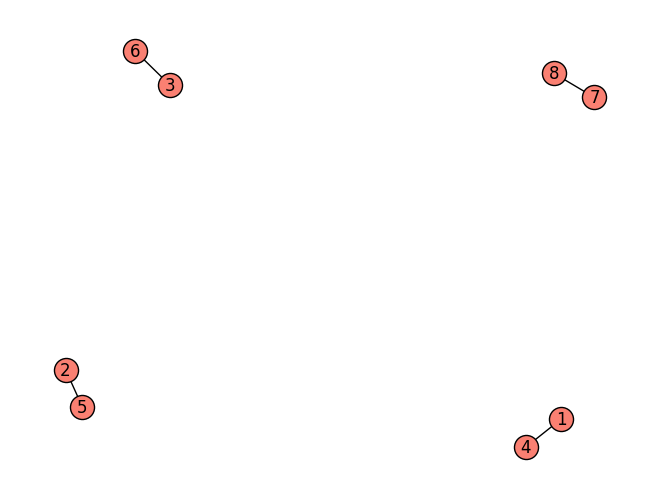

In [38]:
G = nx.Graph()
G.add_edges_from([
    (1, 4), (3, 6), (5, 2), (7, 8)
])

args["node_size"] = 300
nx.draw(G, **args)


**_Question_**

Which condition does $N$ have to satisfy? 

**_Answer_**

$N$ has to be even, because the degree of each node is $1$ only if the nodes are paired in couples. 

- - -

**_Question_**

What is the degree distribution of this network? 

**_Answer_**

The degree distribution is a delta in $1$.

- - -

**_Question_**

How many components does the network have?

**_Answer_**

The network has $N / 2$ components.

- - -

Consider now a network in which each node has degree $k = 2$ and clustering coefficient $C = 1$. 

**_Question_**

How does the network look like? What condition does N satisfy in this case?

**_Answer_**

The network looks like the following:

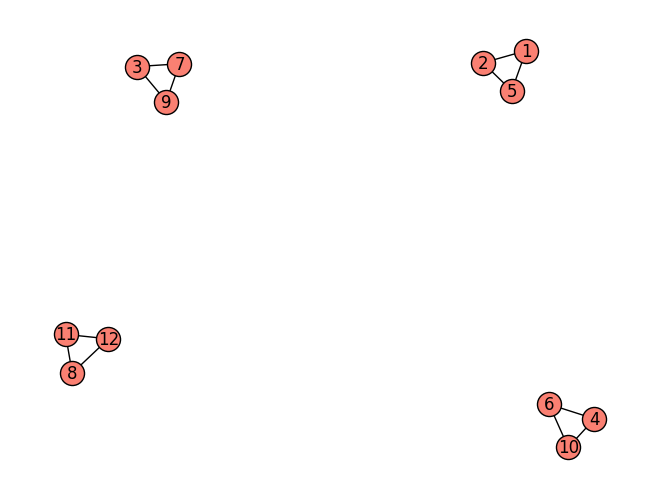

In [39]:
G = nx.Graph()
G.add_edges_from([
    (1, 2), (1, 5), (2, 5),
    (3, 7), (7, 9), (3, 9),
    (4, 6), (6, 10), (4, 10),
    (8, 11), (11, 12), (8, 12),
])

nx.draw(G, **args)

This network ensures both the $k=2$ because each node is linked to the other two in the same triangle, and a clustering coefficient of $C=1$, since picking any node $u$, any neighbours $v$ has a $100\%$ to be linked with all the other neighbours of $u$. 